# Token Classification (Named Entity Recognition)

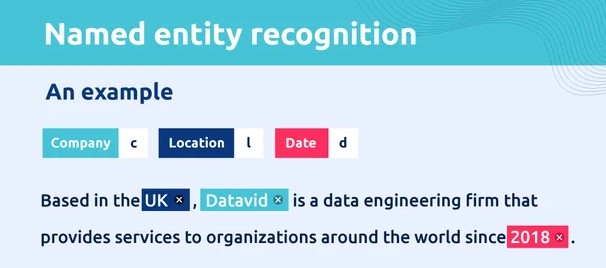

In [1]:
# Transformers installation
! pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


In [2]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wVHdVlPScxA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Token classification assigns a label to individual tokens in a sentence. One of the most common token classification tasks is Named Entity Recognition (NER). NER attempts to find a label for each entity in a sentence, such as a person, location, or organization.

This guide will show you how to:

1. Finetune [DistilBERT](https://huggingface.co/distilbert-base-uncased) on the [conll2003](https://huggingface.co/datasets/eriktks/conll2003) dataset to detect new entities.
2. Use your finetuned model for inference.

<Tip>
The task illustrated in this tutorial is supported by the following model architectures:

<!--This tip is automatically generated by `make fix-copies`, do not fill manually!-->

[ALBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/albert), [BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bert), [BigBird](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/big_bird), [BioGpt](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/biogpt), [BLOOM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bloom), [CamemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/camembert), [CANINE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/canine), [ConvBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/convbert), [Data2VecText](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/data2vec-text), [DeBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta), [DeBERTa-v2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta-v2), [DistilBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/distilbert), [ELECTRA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/electra), [ERNIE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie), [ErnieM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie_m), [ESM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/esm), [FlauBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/flaubert), [FNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/fnet), [Funnel Transformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/funnel), [GPT-Sw3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt-sw3), [OpenAI GPT-2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt2), [GPTBigCode](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_bigcode), [GPT Neo](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neo), [GPT NeoX](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neox), [I-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ibert), [LayoutLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlm), [LayoutLMv2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv2), [LayoutLMv3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv3), [LiLT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/lilt), [Longformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/longformer), [LUKE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/luke), [MarkupLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/markuplm), [MEGA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mega), [Megatron-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/megatron-bert), [MobileBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mobilebert), [MPNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mpnet), [Nezha](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nezha), [Nyströmformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nystromformer), [QDQBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/qdqbert), [RemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/rembert), [RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta), [RoBERTa-PreLayerNorm](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta-prelayernorm), [RoCBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roc_bert), [RoFormer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roformer), [SqueezeBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/squeezebert), [XLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm), [XLM-RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta), [XLM-RoBERTa-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta-xl), [XLNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlnet), [X-MOD](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xmod), [YOSO](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/yoso)

<!--End of the generated tip-->

</Tip>


We encourage you to login to your Hugging Face account so you can upload and share your model with the community. When prompted, enter your token to login:

In [3]:
from huggingface_hub import notebook_login

notebook_login()

In [6]:
import os
from google.colab import userdata
os.environ['HF_READ_TOKEN']=userdata.get('HF_READ_TOKEN')
os.environ['HF_WRITE_TOKEN']=userdata.get('HF_WRITE_TOKEN')

## Load conll2003 dataset

Start by loading the conll2003 dataset from the 🤗 Datasets library:

In [7]:
from datasets import load_dataset

conll = load_dataset("conll2003", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Then take a look at an example:

In [8]:
conll["train"][0]

{'id': '0',
 'tokens': ['EU',
  'rejects',
  'German',
  'call',
  'to',
  'boycott',
  'British',
  'lamb',
  '.'],
 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

Each number in `ner_tags` represents an entity. Convert the numbers to their label names to find out what the entities are:

In [9]:
conll["train"].features["ner_tags"]

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

In [10]:
label_list = conll["train"].features["ner_tags"].feature.names
label_list

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

The letter that prefixes each `ner_tag` indicates the token position of the entity:

- `B-` indicates the beginning of an entity.
- `I-` indicates a token is contained inside the same entity (for example, the `State` token is a part of an entity like
  `Empire State Building`).
- `0` indicates the token doesn't correspond to any entity.

Yukardaki labellar Named Entity Recognition (NER) sisteminde kullanılan etiketlerdir ve IOB (Inside-Outside-Beginning) formatını kullanırlar. NER, metinlerdeki özel isimleri ve bu isimlerin türlerini belirlemek için kullanılır. IOB formatı, metindeki her kelimenin bir etiketle işaretlendiği bir yöntemdir ve bu etiketler kelimenin bir varlık isminin başlangıcında mı, içinde mi yoksa hiçbir varlığa ait değil mi olduğunu belirtir. İşte bu etiketlerin detaylı açıklamaları:

### IOB Formatı:

- **O (Outside)**: Kelime herhangi bir varlık ismine ait değildir.
- **B- (Beginning)**: Kelime bir varlık isminin başlangıcındadır.
- **I- (Inside)**: Kelime bir varlık isminin içindedir.

### Varlık Türleri:

- **PER (Person)**: Kişi isimleri
- **ORG (Organization)**: Kuruluş isimleri
- **LOC (Location)**: Yer isimleri (şehirler, ülkeler, dağlar, vs.)
- **MISC (Miscellaneous)**: Diğer özel isimler (milliyetler, olaylar, eser isimleri, vs.)

### Etiketlerin Detaylı Açıklamaları:

- **O**: Bu etiket, kelimenin herhangi bir özel isimle ilgisi olmadığını belirtir. Örneğin, "The cat sat on the mat." cümlesinde tüm kelimeler "O" etiketi alır.
  
- **B-PER**: Bu etiket, kelimenin bir kişi isminin başlangıcında olduğunu belirtir. Örneğin, "John Doe" adında, "John" kelimesi "B-PER" etiketi alır.
  
- **I-PER**: Bu etiket, kelimenin bir kişi isminin içinde olduğunu belirtir. Örneğin, "John Doe" adında, "Doe" kelimesi "I-PER" etiketi alır.
  
- **B-ORG**: Bu etiket, kelimenin bir kuruluş isminin başlangıcında olduğunu belirtir. Örneğin, "OpenAI Inc." adında, "OpenAI" kelimesi "B-ORG" etiketi alır.
  
- **I-ORG**: Bu etiket, kelimenin bir kuruluş isminin içinde olduğunu belirtir. Örneğin, "OpenAI Inc." adında, "Inc." kelimesi "I-ORG" etiketi alır.
  
- **B-LOC**: Bu etiket, kelimenin bir yer isminin başlangıcında olduğunu belirtir. Örneğin, "New York" adında, "New" kelimesi "B-LOC" etiketi alır.
  
- **I-LOC**: Bu etiket, kelimenin bir yer isminin içinde olduğunu belirtir. Örneğin, "New York" adında, "York" kelimesi "I-LOC" etiketi alır.
  
- **B-MISC**: Bu etiket, kelimenin diğer özel isimlerin (milliyetler, olaylar, eser isimleri, vs.) başlangıcında olduğunu belirtir. Örneğin, "Olympic Games" adında, "Olympic" kelimesi "B-MISC" etiketi alır.
  
- **I-MISC**: Bu etiket, kelimenin diğer özel isimlerin içinde olduğunu belirtir. Örneğin, "Olympic Games" adında, "Games" kelimesi "I-MISC" etiketi alır.

### Örnek Cümle:

Örneğin, "Barack Obama was born in Hawaii." cümlesindeki etiketler şu şekilde olabilir:
- **Barack (B-PER)**
- **Obama (I-PER)**
- **was (O)**
- **born (O)**
- **in (O)**
- **Hawaii (B-LOC)**

Bu etiketler, metinlerdeki özel isimleri otomatik olarak tanımaya ve anlamaya yardımcı olur.

In [11]:
conll["train"].features["pos_tags"]
# Penn Treebank POS (Part-of-Speech) etiketleridir. Bu etiketler, bir cümledeki kelimelerin hangi gramer kategorisine veya türüne ait olduğunu belirlemek için kullanılır. İşte bu etiketlerin anlamları:

#- **"**: Sol çift tırnak
#- **''**: Sağ çift tırnak
#- **#**: Hash işareti
#- **$**: Dolar işareti
#- **( )**: Sol ve sağ parantez
#- **,**: Virgül
#- **.**: Nokta
#- **:**: İki nokta üst üste veya noktalı virgül
#- **``**: Ters çift tırnak
#- **CC**: Koordinat bağlaç (and, or, but)
#- **CD**: Kardinal sayı (one, two, 2)
#- **DT**: Belirleyici (a, an, the)
#- **EX**: Var-yok sözcüğü (there as in "there is")
#- **FW**: Yabancı sözcük
#- **IN**: Edat veya bağlaç (in, of, like)
#- **JJ**: Sıfat (big)
#- **JJR**: Karşılaştırma sıfatı (bigger)
#- **JJS**: Üstünlük sıfatı (biggest)
#- **LS**: Liste işareti (1, A)
#- **MD**: Modifiye edici fiil (can, should)
#- **NN**: Tekil isim (dog)
#- **NNP**: Özel isim (John)
#- **NNPS**: Özel isim, çoğul (Vikings)
#- **NNS**: Çoğul isim (dogs)
#- **NN|SYM**: Sembol veya diğer (NN ve SYM bir arada kullanılır)
#- **PDT**: Predeterminer (all the kids)
#- **POS**: İyelik ekleri (’s, ’)
#- **PRP**: Kişi zamiri (I, he, she)
#- **PRP$**: İyelik zamiri (my, his, her)
#- **RB**: Zarf (quickly)
#- **RBR**: Karşılaştırma zarfı (faster)
#- **RBS**: Üstünlük zarfı (fastest)
#- **RP**: Edat (give up)
#- **SYM**: Sembol
#- **TO**: To (to go)
#- **UH**: Ünlem (oh, oops)
#- **VB**: Fiil, temel form (take)
#- **VBD**: Fiil, geçmiş zaman (took)
#- **VBG**: Fiil, şimdiki zaman (taking)
#- **VBN**: Fiil, geçmiş zaman fiil hali (taken)
#- **VBP**: Fiil, geniş zaman (take)
#- **VBZ**: Fiil, 3. tekil şahıs geniş zaman (takes)
#- **WDT**: Soru belirleyici (which)
#- **WP**: Soru zamiri (who, what)
#- **WP$**: Soru iyelik zamiri (whose)
#- **WRB**: Soru zarfı (where, when)

#Bu etiketler, kelimelerin türlerini belirlemeye ve cümlenin yapısını anlamaya yardımcı olur.

Sequence(feature=ClassLabel(names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None)

In [12]:
conll["train"].features["chunk_tags"]

Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None)

## Preprocess

In [13]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/iY2AZYdZAr0?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


The next step is to load a DistilBERT tokenizer to preprocess the `tokens` field:

In [14]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

## Using of "is_split_into_words" parameters

As you saw in the example `tokens` field above, it looks like the input has already been tokenized. But the input actually hasn't been tokenized yet and you'll need to set `is_split_into_words=True` to tokenize the words into subwords. For example:

In [15]:
example = conll["train"][0]
example["tokens"]

['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']

In [16]:
example = conll["train"][0]
tokenizer(example["tokens"])

{'input_ids': [[101, 7270, 102], [101, 22961, 102], [101, 1528, 102], [101, 1840, 102], [101, 1106, 102], [101, 21423, 102], [101, 1418, 102], [101, 2495, 12913, 102], [101, 119, 102]], 'attention_mask': [[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1]]}

In [17]:
tokenizer(example["tokens"], is_split_into_words=True)

{'input_ids': [101, 7270, 22961, 1528, 1840, 1106, 21423, 1418, 2495, 12913, 119, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [18]:
example = conll["train"][0]
tokenized_input = tokenizer(example["tokens"],
                            is_split_into_words=True,
                            truncation=True,
                            max_length=15,
                            padding = "max_length")
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

['[CLS]',
 'EU',
 'rejects',
 'German',
 'call',
 'to',
 'boycott',
 'British',
 'la',
 '##mb',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [19]:
tokenized_input["input_ids"]

[101,
 7270,
 22961,
 1528,
 1840,
 1106,
 21423,
 1418,
 2495,
 12913,
 119,
 102,
 0,
 0,
 0]

## Using of "word_ids" metod.

However, this adds some special tokens `[CLS]` and `[SEP]` and the subword tokenization creates a mismatch between the input and labels. A single word corresponding to a single label may now be split into two subwords. You'll need to realign the tokens and labels by:

1. Mapping all tokens to their corresponding word with the [`word_ids`](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.BatchEncoding.word_ids) method.
2. Assigning the label `0` to the special tokens `[CLS]` and `[SEP]` so they're ignored by the Tensorflow loss function.
3. Only labeling the first token of a given word. Assign `0` to other subtokens from the same word.

Here is how you can create a function to realign the tokens and labels, and truncate sequences to be no longer than DistilBERT's maximum input length:

In [20]:
samples = conll["train"][1:3]
samples

{'id': ['1', '2'],
 'tokens': [['Peter', 'Blackburn'], ['BRUSSELS', '1996-08-22']],
 'pos_tags': [[22, 22], [22, 11]],
 'chunk_tags': [[11, 12], [11, 12]],
 'ner_tags': [[1, 2], [5, 0]]}

In [21]:
samples["tokens"]

[['Peter', 'Blackburn'], ['BRUSSELS', '1996-08-22']]

In [22]:
samples["ner_tags"]

[[1, 2], [5, 0]]

In [23]:
tokenized_inputs = tokenizer(samples["tokens"],
                             truncation=True,
                             is_split_into_words=True,
                             padding = "max_length",
                             max_length=12)
tokenized_inputs

{'input_ids': [[101, 1943, 14428, 102, 0, 0, 0, 0, 0, 0, 0, 0], [101, 26660, 13329, 12649, 15928, 1820, 118, 4775, 118, 1659, 102, 0]], 'attention_mask': [[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]}

In [24]:
for i, label in enumerate(samples["ner_tags"]):
    word_ids = tokenized_inputs.word_ids(batch_index=i)
    print("input_ids          :", tokenized_inputs['input_ids'][i])
    print("tokens             :", samples["tokens"][i])
    print("tokenized_tokens   :", tokenizer.convert_ids_to_tokens(tokenized_inputs['input_ids'][i]))
    print("word_ids           :", word_ids)
    print("label_ids(ner_tags):", label)
    print()
    # word_ids tokenlerin liste içindeki indexlerini, ve özel tokenleri döndürür.

input_ids          : [101, 1943, 14428, 102, 0, 0, 0, 0, 0, 0, 0, 0]
tokens             : ['Peter', 'Blackburn']
tokenized_tokens   : ['[CLS]', 'Peter', 'Blackburn', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
word_ids           : [None, 0, 1, None, None, None, None, None, None, None, None, None]
label_ids(ner_tags): [1, 2]

input_ids          : [101, 26660, 13329, 12649, 15928, 1820, 118, 4775, 118, 1659, 102, 0]
tokens             : ['BRUSSELS', '1996-08-22']
tokenized_tokens   : ['[CLS]', 'BR', '##US', '##SE', '##LS', '1996', '-', '08', '-', '22', '[SEP]', '[PAD]']
word_ids           : [None, 0, 0, 0, 0, 1, 1, 1, 1, 1, None, None]
label_ids(ner_tags): [5, 0]



## Tokenization by using "is_split_into_words" parameter and "word_ids" metod

In [25]:
max([len(i) for i in conll["train"]["tokens"]])

113

In [26]:
def tokenize_and_align_labels(examples):
    # examples.reset_index(drop=True)
    tokenized_inputs = tokenizer(examples["tokens"],
                                 truncation=True,
                                 is_split_into_words=True,
                                 padding = "max_length",
                                 max_length=113)
    # tüm cümlelerin input_ids ile attention_mask vektörleri en uzun cümlenin token sayısına sabitleniyor.

    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)

        # i index numaraları batch_index parametresine tanımlanarak her cümleye karşılık gelen word_ids'leri teker teker çekiyoruz.
        # word_ids fonksiyonu ile her texte ait tokenler cümledeki sıralamasına göre 0'dan başlayarak numaralandırılıyor. Ancak,
        # wordpiece tekniğiyle köklerine ve eklerine ayrılan tokenler aynı tokeni temsil ettiğinden aynı numara ile numaralandırılması gerekiyor.
        # [CLS], [SEP], [PAD] special tokenleri ise None'a dönüştürülüyor. None olan bu tokenlere aşağıda kuracağımız for döngüsü
        # ile 0 atayacağız.
        # örneğin, ['[CLS]', 'Turkey', "'", 's', 'Tora', '##s', 'mountains', 'are','famous', '[SEP]', '[PAD]', '[PAD]'] cümlesi
        # [None, 0, 0, 0, 1, 1, 2, 3, 4, None, None, None] şeklinde cümledeki token sıralamasına göre 0'dan başlayarak numaralandırılıyor.
        # Dikkat ederseniz 'Turkey', "'", 's' tokenleri "Turkey's" tokenini temsil ettiğinden 0 numarasıyla, 'Tora', '##s' tokenleri de
        # "Toras" tokenini temsil ettiklerinden 1 numarası ile numaralandırılırken special tokenler None'a dönüştürülüyor. Bu işlemi yapma
        # sebebimiz köklerine ve eklerine ayrılan tokenlere aynı tag (etiket)'lerin atanmasını sağlamak.


        # Label ile her cümleye ait tagleri çekiyoruz.Ancak çektiğimiz tagler köklerine ve eklerine göre ayrılan tokenleri temsil etmediğinden
        # köklerine ve eklerine ayrılan tokenlere aynı tag numarasını atamamız gerekiyor. Bunun için word_ids listesinde yer alan numaraları
        # labels'dan çekeceğimiz taglerin indexi için kullanacağız.
        # Örnek, yukardaki örnek cümlemizin labelı [1, 2, 11, 0, 0] taglerinden oluşuyor. Gördüğünüz gibi orjinal cümlemiz 5 adet tag'den
        # oluşuyor. [Turkey's : 1, Toras :2, mountains :11, are :0, famous :0] şeklinde tag'leri belirlenen cümlemiz, Yukarıdaki gibi
        # tokenlerine ayrıldığında "Turkey":1, "'":1, "s":1, "Tora":2, "s":2, "mountains":11, "are":0, "famous":0=> [1, 1, 1, 2, 2, 11, 0, 0]
        # olacak şekilde taglerinin atanması gerekiyor. Bunun için aynı tokeni temsil eden kökler ve eklerine aynı tag'i atamak için
        # [None, 0, 0, 0, 1, 1, 2, 3, 4, None, None, None] word_ids listesinde yer alan numaraları index olarak kullanıp sırasıyla
        # [1, 2, 11, 0, 0] labelından tagleri çekeceğiz.
        # örnek, a = [1, 2, 11, 0, 0] dersek,
        # a[0]:1, a[0]:1, a[0]:1, a[1]:2, a[1]:2, a[2]:11, a[3]:0, a[4]:0 --> [1,1,1,2,2,11,0,0] taglerine dönüştürdük. Bu işlemi aşağıda
        # label[word_idx] kodu ile yapacağız.
        # Bu işlemi yapmaz isek modelimiz bu tokenlerin aynı tokeni temsil ettiğini anlayamaz.

        # previous_word_idx = None
        label_ids = []
        for word_idx in word_ids: # Set the special tokens to 0.
        # word_ids içindeki tüm elemanlar çekiliyor. None olanlar için labels_ids boş listesine 0 numarası atanıyor.
            if word_idx is None:
                label_ids.append(0)
            elif word_idx != None: # Only label the first token of a given word.
        # None değilse for label ile her cümleye ait token
                label_ids.append(label[word_idx])

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [27]:
tokenize_and_align_labels(conll["train"][:1])

{'input_ids': [[101, 7270, 22961, 1528, 1840, 1106, 21423, 1418, 2495, 12913, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'labels': [[0, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
tokenize_and_align_labels(conll["train"][100:101])

{'input_ids': [[101, 16890, 25473, 11690, 1110, 14042, 1146, 1117, 1858, 1112, 9088, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'labels': [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

To apply the preprocessing function over the entire dataset, use 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map) function. You can speed up the `map` function by setting `batched=True` to process multiple elements of the dataset at once:

In [29]:
tokenized_conll = conll.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [30]:
tokenized_conll

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 3453
    })
})

## Create Optimizer

<Tip>

If you aren't familiar with finetuning a model with Keras, take a look at the basic tutorial [here](https://huggingface.co/docs/transformers/main/en/tasks/../training#train-a-tensorflow-model-with-keras)!

</Tip>
To finetune a model in TensorFlow, start by setting up an optimizer function, learning rate schedule, and some training hyperparameters:

In [31]:
from transformers import create_optimizer

batch_size = 32
num_train_epochs = 2
num_train_steps = (len(tokenized_conll["train"]) // batch_size) * num_train_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
    num_warmup_steps=0.1
)

Before you start training your model, create a map of the expected ids to their labels with `id2label` and `label2id`:

In [32]:
id2label = {i:j for i, j in enumerate(label_list)}
label2id = {j:i for i, j in enumerate(label_list)}

In [33]:
id2label

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC',
 7: 'B-MISC',
 8: 'I-MISC'}

In [34]:
label2id

{'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-ORG': 3,
 'I-ORG': 4,
 'B-LOC': 5,
 'I-LOC': 6,
 'B-MISC': 7,
 'I-MISC': 8}

## Training

Then you can load DistilBERT with [TFAutoModelForTokenClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.TFAutoModelForTokenClassification) along with the number of expected labels, and the label mappings:

In [35]:
from transformers import TFAutoModelForTokenClassification

model = TFAutoModelForTokenClassification.from_pretrained(
    "distilbert-base-cased",
    num_labels=9,
    id2label=id2label,
    label2id=label2id
)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForTokenClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForTokenClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForTokenClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able t

Convert your datasets to the `tf.data.Dataset` format with [prepare_tf_dataset()](https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.TFPreTrainedModel.prepare_tf_dataset):

In [36]:
tokenized_conll["train"]

Dataset({
    features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 14041
})

In [37]:
tokenized_conll["validation"]

Dataset({
    features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 3250
})

In [38]:
tf_train_set = model.prepare_tf_dataset(
    tokenized_conll["train"],
    shuffle=False,
    batch_size=32
)

tf_validation_set = model.prepare_tf_dataset(
    tokenized_conll["validation"],
    shuffle=False,
    batch_size=32
)

In [39]:
tf_train_set

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 113), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 113), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 113), dtype=tf.int64, name=None))>

Configure the model for training with [`compile`](https://keras.io/api/models/model_training_apis/#compile-method). Note that Transformers models all have a default task-relevant loss function, so you don't need to specify one unless you want to:

In [40]:
import tensorflow as tf

model.compile(optimizer=optimizer)  # No loss argument!

## Loading The Model to Huggingface Hub

Specify where to push your model and tokenizer in the [PushToHubCallback](https://huggingface.co/docs/transformers/main/en/main_classes/keras_callbacks#transformers.PushToHubCallback):

In [41]:
from transformers.keras_callbacks import PushToHubCallback

push_to_hub_callback = PushToHubCallback(
    output_dir="abakirci/my_conll_model",
    tokenizer=tokenizer,
    hub_token=os.environ['HF_WRITE_TOKEN']
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/abakirci/my_conll_model into local empty directory.


Then bundle your callbacks together:

In [42]:
callbacks = [push_to_hub_callback]

Finally, you're ready to start training your model! Call [`fit`](https://keras.io/api/models/model_training_apis/#fit-method) with your training and validation datasets, the number of epochs, and your callbacks to finetune the model:

In [43]:
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=2, callbacks=callbacks)

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
439/439 [==============================] - 137s 219ms/step - loss: 0.1344 - val_loss: 0.0392
Epoch 2/2
439/439 [==============================] - 100s 228ms/step - loss: 0.0313 - val_loss: 0.0259


In [44]:
tf_test_set = model.prepare_tf_dataset(
    tokenized_conll["test"],
    shuffle=False,
    batch_size=32
)

In [45]:
logits=model.predict(tf_test_set)
logits.logits

108/108 [==============================] - 9s 56ms/step


array([[[ 8.265371  , -1.4125085 , -1.9495859 , ..., -1.6146749 ,
         -0.701937  , -1.1071708 ],
        [ 5.7327867 , -0.3198488 , -2.6060362 , ..., -2.0744898 ,
          0.20315446, -0.825313  ],
        [ 6.004584  , -0.37346008, -2.8265214 , ..., -2.2740011 ,
          0.31326306, -0.6338374 ],
        ...,
        [ 8.768723  , -1.6301577 , -1.5586686 , ..., -1.3518881 ,
         -1.1634258 , -1.0195961 ],
        [ 8.77255   , -1.6291707 , -1.5618993 , ..., -1.3511775 ,
         -1.1644326 , -1.015004  ],
        [ 8.768598  , -1.6359682 , -1.5809338 , ..., -1.3569602 ,
         -1.1550913 , -1.016144  ]],

       [[ 7.2404537 , -0.9082592 , -0.72737026, ..., -1.5310458 ,
         -1.1369779 , -1.3303635 ],
        [ 0.4647476 ,  4.1432576 , -1.031179  , ..., -1.4744107 ,
         -0.20075959, -1.7409003 ],
        [ 0.23995431,  4.034067  , -0.14347932, ..., -1.940943  ,
         -0.16730222, -1.2708515 ],
        ...,
        [ 8.243836  , -1.2825952 , -0.85051197, ..., -

In [46]:
logits.logits[0]

array([[ 8.265371  , -1.4125085 , -1.9495859 , ..., -1.6146749 ,
        -0.701937  , -1.1071708 ],
       [ 5.7327867 , -0.3198488 , -2.6060362 , ..., -2.0744898 ,
         0.20315446, -0.825313  ],
       [ 6.004584  , -0.37346008, -2.8265214 , ..., -2.2740011 ,
         0.31326306, -0.6338374 ],
       ...,
       [ 8.768723  , -1.6301577 , -1.5586686 , ..., -1.3518881 ,
        -1.1634258 , -1.0195961 ],
       [ 8.77255   , -1.6291707 , -1.5618993 , ..., -1.3511775 ,
        -1.1644326 , -1.015004  ],
       [ 8.768598  , -1.6359682 , -1.5809338 , ..., -1.3569602 ,
        -1.1550913 , -1.016144  ]], dtype=float32)

In [47]:
len(logits.logits[0])

113

In [48]:
logits.logits[0][0]

array([ 8.265371 , -1.4125085, -1.9495859, -1.063366 , -1.3167566,
       -1.3054471, -1.6146749, -0.701937 , -1.1071708], dtype=float32)

In [49]:
import tensorflow as tf

probabilities = tf.nn.softmax(logits.logits, axis=-1).numpy()

probabilities

array([[[9.99409914e-01, 6.26172623e-05, 3.65968808e-05, ...,
         5.11557228e-05, 1.27435749e-04, 8.49767675e-05],
        [9.84672129e-01, 2.31560972e-03, 2.35389292e-04, ...,
         4.00529418e-04, 3.90663603e-03, 1.39683497e-03],
        [9.88854825e-01, 1.67951232e-03, 1.44488164e-04, ...,
         2.51066405e-04, 3.33751552e-03, 1.29450264e-03],
        ...,
        [9.99677777e-01, 3.04567693e-05, 3.27138150e-05, ...,
         4.02285950e-05, 4.85716628e-05, 5.60850713e-05],
        [9.99678731e-01, 3.03704237e-05, 3.24837638e-05, ...,
         4.01034486e-05, 4.83374752e-05, 5.61280358e-05],
        [9.99677896e-01, 3.02840926e-05, 3.19974824e-05, ...,
         4.00300523e-05, 4.89842860e-05, 5.62860696e-05]],

       [[9.98091161e-01, 2.88555311e-04, 3.45770735e-04, ...,
         1.54794776e-04, 2.29560828e-04, 1.89195882e-04],
        [2.25642901e-02, 8.93260717e-01, 5.05532417e-03, ...,
         3.24530806e-03, 1.15983337e-02, 2.48611299e-03],
        [2.03796066e-02, 

In [50]:
import numpy as np

y_pred=[]
for i in probabilities:
  for j in i:
      y_pred.append(np.argmax(j))

In [51]:
y_test = []
for i in tokenized_conll["test"]["labels"]:
  for j in i:
    y_test.append(j)

In [52]:
len(y_pred)

390189

In [53]:
len(y_test)

390189

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    374684
           1       0.93      0.90      0.92      2982
           2       0.96      0.99      0.97      2691
           3       0.83      0.84      0.83      3524
           4       0.77      0.89      0.82      1309
           5       0.84      0.88      0.86      2996
           6       0.84      0.63      0.72       415
           7       0.70      0.55      0.62      1266
           8       0.42      0.31      0.36       322

    accuracy                           0.99    390189
   macro avg       0.81      0.78      0.79    390189
weighted avg       0.99      0.99      0.99    390189



In [55]:
label_list

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [56]:
[i for i in range(1, len(label_list))]
#labels

[1, 2, 3, 4, 5, 6, 7, 8]

In [57]:
label_list[1:]
#target_names

['B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [58]:
print(classification_report(y_test, y_pred, labels=[i for i in range(1, len(label_list))], target_names=label_list[1:]))

              precision    recall  f1-score   support

       B-PER       0.93      0.90      0.92      2982
       I-PER       0.96      0.99      0.97      2691
       B-ORG       0.83      0.84      0.83      3524
       I-ORG       0.77      0.89      0.82      1309
       B-LOC       0.84      0.88      0.86      2996
       I-LOC       0.84      0.63      0.72       415
      B-MISC       0.70      0.55      0.62      1266
      I-MISC       0.42      0.31      0.36       322

   micro avg       0.85      0.85      0.85     15505
   macro avg       0.79      0.75      0.76     15505
weighted avg       0.85      0.85      0.85     15505



In [59]:
def class_report(data, data_type="test"):
  from sklearn.metrics import classification_report

  logits=model.predict(data)
  probabilities=tf.nn.softmax(logits.logits, axis=-1).numpy()
  y_pred=[]
  for i in probabilities:
    for j in i:
        y_pred.append(np.argmax(j))

  y_test=[]
  for i in tokenized_conll[data_type]["labels"]:
    for j in i:
        y_test.append(j)

  return print(classification_report(y_test, y_pred, labels=[i for i in range(1, len(label_list))], target_names=label_list[1:]))


In [60]:
class_report(tf_test_set, data_type="test")

108/108 [==============================] - 6s 56ms/step
              precision    recall  f1-score   support

       B-PER       0.93      0.90      0.92      2982
       I-PER       0.96      0.99      0.97      2691
       B-ORG       0.83      0.84      0.83      3524
       I-ORG       0.77      0.89      0.82      1309
       B-LOC       0.84      0.88      0.86      2996
       I-LOC       0.84      0.63      0.72       415
      B-MISC       0.70      0.55      0.62      1266
      I-MISC       0.42      0.31      0.36       322

   micro avg       0.85      0.85      0.85     15505
   macro avg       0.79      0.75      0.76     15505
weighted avg       0.85      0.85      0.85     15505



In [61]:
class_report(tf_validation_set, data_type="validation")

102/102 [==============================] - 6s 56ms/step
              precision    recall  f1-score   support

       B-PER       0.94      0.92      0.93      3304
       I-PER       0.97      0.98      0.98      2992
       B-ORG       0.84      0.85      0.84      2702
       I-ORG       0.74      0.82      0.78      1079
       B-LOC       0.90      0.88      0.89      3635
       I-LOC       0.85      0.59      0.69       381
      B-MISC       0.75      0.64      0.69      1480
      I-MISC       0.90      0.34      0.49       591

   micro avg       0.89      0.85      0.87     16164
   macro avg       0.86      0.75      0.79     16164
weighted avg       0.89      0.85      0.86     16164



In [62]:
class_report(tf_train_set, data_type="train")

439/439 [==============================] - 25s 57ms/step
              precision    recall  f1-score   support

       B-PER       0.94      0.93      0.94     12276
       I-PER       0.97      0.99      0.98     10325
       B-ORG       0.86      0.86      0.86     13357
       I-ORG       0.82      0.88      0.85      6119
       B-LOC       0.89      0.92      0.90     13329
       I-LOC       0.86      0.62      0.72      1706
      B-MISC       0.80      0.63      0.70      5949
      I-MISC       0.85      0.39      0.53      1969

   micro avg       0.89      0.87      0.88     65030
   macro avg       0.87      0.78      0.81     65030
weighted avg       0.89      0.87      0.87     65030



Once training is completed, your model is automatically uploaded to the Hub so everyone can use it!

<Tip>

For a more in-depth example of how to finetune a model for token classification, take a look at the corresponding
[PyTorch notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/token_classification.ipynb)
or [TensorFlow notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/token_classification-tf.ipynb).

</Tip>

## Inference

Great, now that you've finetuned a model, you can use it for inference!

Grab some text you'd like to run inference on:

In [63]:
text = "The Golden State Warriors are an American professional basketball team based in San Francisco."

The simplest way to try out your finetuned model for inference is to use it in a [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline). Instantiate a `pipeline` for NER with your model, and pass your text to it:

In [66]:
from transformers import pipeline

classifier = pipeline("ner", model="abakirci/my_conll_model", device=0)

Some layers from the model checkpoint at abakirci/my_conll_model were not used when initializing TFDistilBertForTokenClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForTokenClassification were not initialized from the model checkpoint at abakirci/my_conll_model and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
classifier(text)

[{'entity': 'B-ORG',
  'score': 0.5793001,
  'index': 2,
  'word': 'Golden',
  'start': 4,
  'end': 10},
 {'entity': 'I-ORG',
  'score': 0.73309773,
  'index': 3,
  'word': 'State',
  'start': 11,
  'end': 16},
 {'entity': 'I-ORG',
  'score': 0.6822512,
  'index': 4,
  'word': 'Warriors',
  'start': 17,
  'end': 25},
 {'entity': 'B-MISC',
  'score': 0.8150989,
  'index': 7,
  'word': 'American',
  'start': 33,
  'end': 41},
 {'entity': 'B-LOC',
  'score': 0.90863824,
  'index': 13,
  'word': 'San',
  'start': 80,
  'end': 83},
 {'entity': 'I-LOC',
  'score': 0.66781557,
  'index': 14,
  'word': 'Francisco',
  'start': 84,
  'end': 93}]